# Emotion Classification Using Augmented Dataset: Train, Validation, and Test Splits with Logistic Regression

In this Colab notebook, we apply **Logistic Regression** on the synonym-augmented dataset for emotion classification. To ensure robust evaluation, the dataset is divided into **training**, **validation**, and **testing** subsets, following a 60%-20%-20% split.

### Key Highlights:
1. **Dataset Splitting:**
   - The dataset is split into training (60%), validation (20%), and testing (20%) sets.
   - The validation set is used for hyperparameter tuning, while the test set evaluates model performance on unseen data.

2. **Text Feature Engineering:**
   - Text data is transformed into numerical features using **TF-IDF Vectorization**.

3. **Model Training and Evaluation:**
   - Logistic Regression is trained with default parameters.
   - Performance is evaluated on:
     - Training set: To ensure the model learns from the data.
     - Validation set: To assess generalization during tuning.
     - Test set: To measure final model performance.

4. **Confusion Matrix Analysis:**
   - Visualize the model's predictions on the test set using a confusion matrix to identify strengths and weaknesses in classification.

This notebook demonstrates a systematic approach to training, validating, and testing a machine learning model **(Logisitc Regression)** for emotion classification using a balanced augmented dataset.



Training Accuracy: 0.6394604803247266
Classification Report on Training Data:
               precision    recall  f1-score   support

       anger       0.68      0.52      0.59     12530
     boredom       0.88      0.92      0.90      9899
   confusion       0.60      0.64      0.62     12650
     disgust       0.63      0.70      0.67     13763
        fear       0.58      0.49      0.53     13012
       guilt       0.57      0.54      0.55     13678
         joy       0.56      0.67      0.61     16533
     neutral       0.71      0.70      0.70     12356
     sadness       0.56      0.53      0.54     14313
       shame       0.60      0.56      0.58     12923
    surprise       0.79      0.89      0.84     10247

    accuracy                           0.64    141904
   macro avg       0.65      0.65      0.65    141904
weighted avg       0.64      0.64      0.64    141904


Validation Accuracy: 0.5782541595315109
Classification Report on Validation Data:
               precision

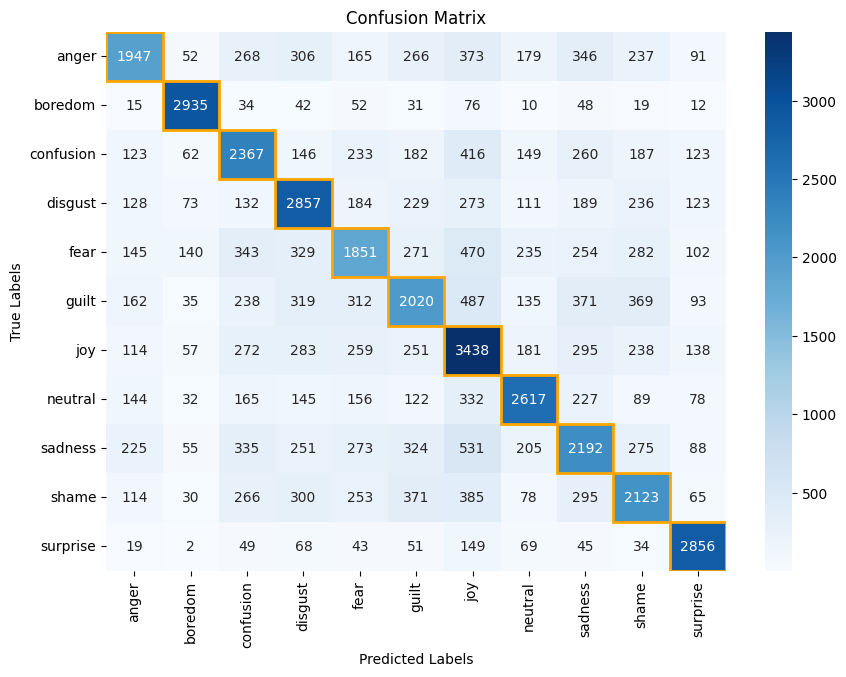

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Load the augmented dataset
# Purpose: Load the dataset containing cleaned text and their corresponding emotion labels.
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Step 2: Split the dataset into features (X) and labels (y)
# X: Cleaned text data
# y: Emotion labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split into train, validation, and test sets (60%-20%-20%)
# Purpose: Divide the data into training, validation, and test subsets for model training and evaluation.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Vectorize the text data using TF-IDF
# Purpose: Convert text data into numerical feature vectors suitable for machine learning models.
tfidf = TfidfVectorizer(max_features=5000)  # Maximum number of features set to 5000 for dimensionality control
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform training data
X_val_tfidf = tfidf.transform(X_val)         # Transform validation data
X_test_tfidf = tfidf.transform(X_test)       # Transform testing data

# Step 5: Train Logistic Regression with default parameters
# Purpose: Train a Logistic Regression model on the training data.
log_reg_model = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression with maximum iterations
log_reg_model.fit(X_train_tfidf, y_train)          # Train the model

# Step 6: Evaluate the model on the training set
# Purpose: Check model performance on training data to ensure it has learned effectively.
y_train_pred = log_reg_model.predict(X_train_tfidf)  # Predict on training data
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy
print("\nTraining Accuracy:", train_accuracy)
print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))

# Step 7: Validate the model on the validation set
# Purpose: Assess model generalization using the validation set.
y_val_pred = log_reg_model.predict(X_val_tfidf)  # Predict on validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate validation accuracy
print("\nValidation Accuracy:", val_accuracy)
print("Classification Report on Validation Data:\n", classification_report(y_val, y_val_pred))

# Step 8: Test the model on the test set
# Purpose: Evaluate model performance on unseen test data.
y_test_pred = log_reg_model.predict(X_test_tfidf)  # Predict on test data
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate test accuracy
print("\nTest Accuracy:", test_accuracy)
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 9: Confusion matrix visualization
# Purpose: Provide detailed insights into model predictions for the test set.

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """
    Plot the confusion matrix to analyze prediction results.
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Unique class labels
    - title: Title for the confusion matrix plot
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)  # Generate confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot heatmap
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Highlight the diagonal elements for correct predictions
    for i in range(len(cm)):
        plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='orange', lw=2))

    plt.show()

# Call the function to plot the confusion matrix for the test set
plot_confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
